# 05. 회귀

## 01 회귀 소개

#### 회귀분석
: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법<br>
- 여러 개의 독힙 변수와 한 개의 종속 변수 간의 상관관계를 모델링하는 기법을 통칭
- Y: 종속변수; X: 독립변수; W: 회귀 계수(Regression coefficients)
<br>
<img src="https://t1.daumcdn.net/thumb/R720x0.fpng/?fname=http://t1.daumcdn.net/brunch/service/user/17Xk/image/UyWscX8-GpXs1H_frIKZsnuzU1k.png">
<br>
머신러닝 관점에서 독립변수는 피처에 해당, 종속변수는 결정 값<br>
→ 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수 찾아내기<br>

#### 회귀유형
- 독립변수의 개수
  - 1개: 단일 회귀
  - 여러개: 다중 회귀
- 회귀 계수의 결합
  - 선형: 선형 회귀; 가장 많이 사용 됨
  - 비선형: 비선형 회귀

#### 분류와 회귀의 예측 결과값 차이
- 분류: 이산형 클래스 값; 예측값이 카테고리와 같음
- 회귀: 연속형 숫자 값;

#### 선형회귀
: 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식; 규제 방법에 따라 별도의 유형으로 나룰 수 있음<br>
*규제(Regulariation): 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용

대표 모델
- 일반 선형 회귀: 예측값과 실제 값의 *RSS(잔차의 제곱의 합)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않는 모델
- 릿지: 선형 회귀에 L2 규제를 추가한 회귀 모델; 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 L2 규제를 적용;
- 라쏘: 선형 회귀에 L1 규제를 적용한 방식; 예측 영향력이 작은 피터의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함; L1 규제 = 피처 선택 기능
- 엘라스틱넷: L2, L1 규제를 함께 결합한 모델; 피처가 많은 데이터 세트에 적용; L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기 조정
- 로지스틱 회귀: 분류에 사용되는 선형 모델; 이진 분류뿐만 아니라 희소 영역의 분류(ex. 텍스트 분류)등에 뛰어난 예측 성능을 보임 

## 02 단순 선형 회귀를 통한 회귀 이해
: 독립변수도 하나, 종속변수도 하나인 선형 회귀

<img src="https://i.pinimg.com/originals/ea/08/8a/ea088aec8952b49eedd7cf16b58cd283.jpg">

최적의 회귀 모델 = 전체 데이터의 잔차(오류 값) 합의 최소 = 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수<br>
→ 오류 값의 제곱을 구해서 더하는 방식(RSS) 이용

#### RSS
- Error^2
- 중심 변수: w 변수(회귀 계수)
- 회귀에서 RSS는 비용(Cost)dlau, w 변수(회귀계수)로 구성되는 RSS를 비용 함수(= 손실 함수)라고 함
- 머신러닝 회귀 알고리즘은 비용 함수가 반환하는 값(오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것
<img src="https://gblobscdn.gitbook.com/assets%2F-LagOeJ2nL90MQERwhxy%2F-LcD3LvPh92J91bNGD_Z%2F-LcD6E-B5U_GCqfaZSEL%2Fimage.png?alt=media&token=b89b84a4-4b4e-4994-9b6a-27504831c2d8">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSU7VTOYfEtigRNmrrWBVtPaD9w1n2OBgPRlQ&usqp=CAU">

<br>

## 03 비용 최소화하기 - 경사 하강법(Gradient Descent)소개
: 경사하강법은 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식(수식 참고 p296)
- 비용함수 RSS를 최소화하는 방법을 직관적으로 제공함

<img src="https://artificialnetworkforstarters.readthedocs.io/en/latest/_images/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%EA%B7%B8%EB%9E%98%ED%94%84.png">
→ 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 W를 반환


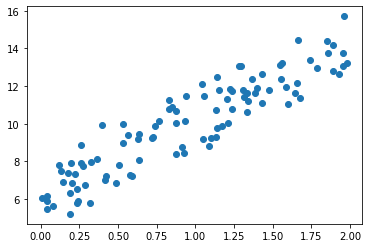

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

#### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.

- 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적
- 새로운 w1과 w0를 update함

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

#### 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

#### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [6]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


예측 오류 비용은 약 0.9935<br>
앞에서 구한 y_pred에 기반해 회귀선 생성

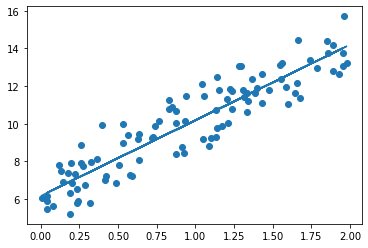

In [7]:
plt.scatter(X, y)
plt.plot(X,y_pred)

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

확률적 경사 하강법(Stochastic Gradient Descent)
- 일부 데이터만 이용해 w가 업데이트 되는 값을 계산 → 빠른 속도 보장; 대용량의 경우 이용
- 경사 하강법과 큰 차이 없음
- 다만 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분에 대해서만 차이 존재

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

#### stochastic_gradient_descent_steps()을 이용한 w1, w0 및 예측 오류 비용 계산

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


경사 하강법 결과
w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935

경사 하강법으로 구한 값과 큰 차이가 없으며, 예측 성능상의 차이 또한 없음을 알 수 있음<br>
→ 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법 이용

#### W배열로 표기한 예측 행렬
<img src="https://cdn.inflearn.com/public/comments/6fb64dc0-855c-4fcb-970d-bc141cb979ab/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%8B%9D02.png">


## 04 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
↑ 사이킷런이 지원하는 다양한 선형 모듈 확인 가능

#### Linear Regression 클래스 - Ordinary Least Squares
: 예측값과 실제 값인 RSS를 최소화해 OLS 추정 방식으로 구현
: fit() 으로 X, y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장

In [40]:
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_x=True, n_jobs=1)

#### 입력 파라미터
- fit_intercept: 불린 값; Intercept(절편) 값을 계산할 것인지 말지를 지정, Faslse 지정 시 intercept가 사용되지 않고 0으로 지정; default = True
- normalize: 불린 값; fit_intercept가 False인 경우 무시 됨, True일 경우 회귀를 수행하기 전에 입력 데이터 세트를 정규화 함; default = False

#### 속성
- coef_: fit()을 수행할 때 회귀 계수가 배열 형태로 저장. Shape는 (Target 값 개수, 피처 개수)
- intercept_: intercept 값

OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음

#### 다중 공선성(multi-collinearity) 문제
: 피처간 상관관계가 높은 경우 분산이 매우 커져 오류에 매우 민감해짐
#### 해결 방식
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- 매우 많은 피터가 위 문제가 있다면  PCA를 통해 축소 수행 (고려 가능)

#### 회귀 평가 지표
: 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표
<img src="https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

1) MAE (Mean Absolute Error)
   -  실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것
2) MSE (Mean Squared Log Error)
   - 실제 값과 예측값의 차이를 제곱해 평균한 것
3) RMSE (Root Mean Squared Eerror)
   - MSE 같은 오류의 제곱을 구할때 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것
       *※ sklearn에서 RMSE를 직접 제공하지 않기 때문에 MSE에 루트를 씌워서 직접 만들어 사용할 수 있다. 
4) R 제곱
   - 분산 기반으로 예측 성능을 평가한다. 실제 값의 분싼 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울 수록 예측 정확도가 높다. 
   - R 제곱 = 예측값 Variance / 실제값 Variance
   
   
#### cross_val_score나 GridSearchCV와 같은 sklean의 Scoring 함수에 회귀 평가 적용시 유의할 점
scoring 함수에 회귀 평가 지표를 적용 할 때는 
- MAE는 'neg_mean_absolute_error'로, 
- MSE는 'neg_mean_squared_error'로, 
- R제곱은 'r2'로 scoring 파라미터에 적어주는데, 
sklearn에서는 score값이 클수록 좋은 평가 결과로 자동 평가해버림. 그래서 -을 곱해서 반대의 의미로 만들어주는게 적용. 즉, -1을 원래의 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함<br>
따라서 Scoring 함수에 일반적으로 반영하려면 보정 필요

#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
*사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터 이용*

피처에 대한 설명 
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

#### load_boston()을 로드하고 DataFrame으로 변경

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 각 컬럼별로 주택가격에 미치는 영향도를 조사

regplot(): seaborn API. X, Y축 값의 산점도와 함께 선형 회귀 직선을 그림
matplotlib.subplots(): 여러 그래프를 한번에 표현

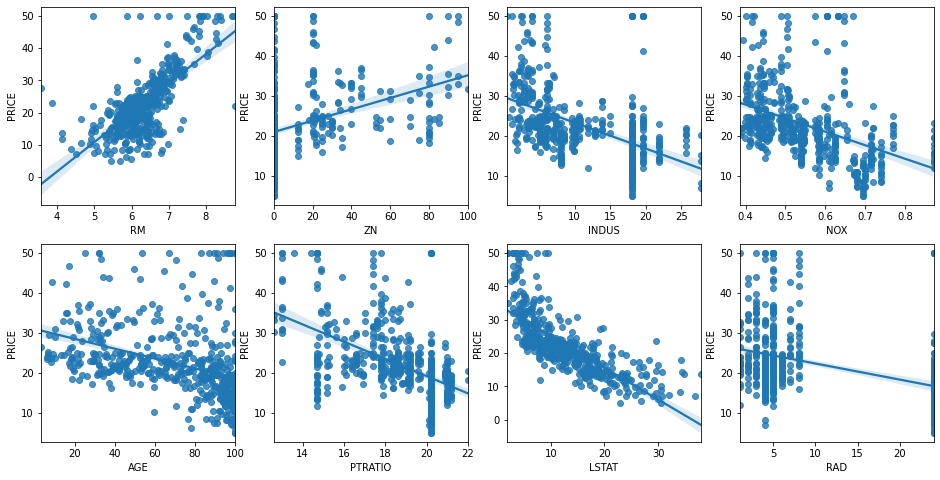

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

#### 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [13]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.9955951721646
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 05 다항 회귀와 과(대)적합/과소적합 이해

#### 다항(Polynomial) 회귀 이해
: 회귀가 독립변수의 2차, 3차 방정식과 같은 다항식으로 표현 되는 것; **선형회귀(회귀 계수 선형)**

<img src="https://t2.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/Jr9/image/rCgyX4NNt5pylBMfCH7RaA1GD2o.png">

*선형/비선형을 나누는 기준은 회귀 꼐수가 선형/비선형인지에 따른 것으로 독립변수의 선형/비선형 여부와는 무관함*

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음<br>
PolynomialFeatures 클래스를 통하여 Polynomial(다항식) 피처로 변환. fit(), transform()을 통해 전처리 변환 작업 수행

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

In [17]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


#### 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [18]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


#### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

- 사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 보스턴 주택가격 예측(정리)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (506, 14)
MSE : 79625.592 , RMSE : 282.180
Variance score : -1116.598


In [21]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

#### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐<br>
→ 차수가 높아질수록 과적합의 문제가 발생

원데이터셋: 피처 X과 target y가 Noise가 포함된 다항식의 코사인 그래프 관계를 가짐<br>
예제: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

→다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교

#### cosine 곡선에 약간의 Noise 변동값을 더하여 실제값(y) 곡선을 만듬

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

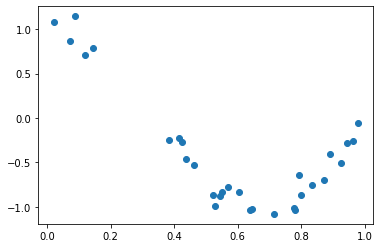

In [38]:
plt.scatter(X, y)

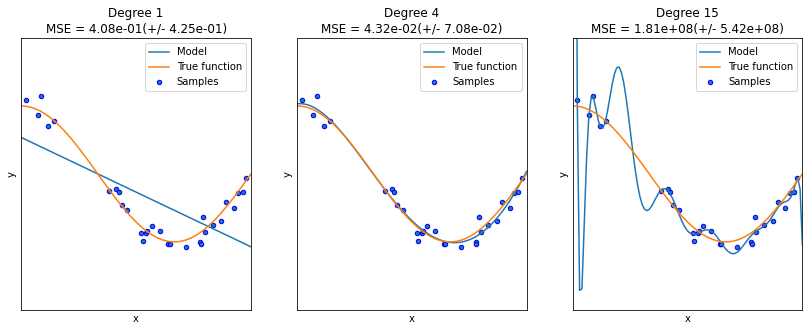

In [41]:
"""
//Degree 4랑 15를 그리지 못하고 에러 발생
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### 편향-분산 트레이드오프(Bias-Variance Trade off) 
앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우침 → 고편향<br>
반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가짐 → 고분산성<br>
<br>
일반적으로 편향과 분산을 한 쪽이 높으며 한 쪽이 낮아짐<br>
편향이 너무 높으면 전체 오류가 높고, 낮추면 분산이 높아지며 전체 오류가 낮아짐<br>
편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 **골디락스**지점을 통과 후, 분산이 더 높아지면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨 <br>


<img src="https://www.endtoend.ai/assets/blog/misc/bias-variance-tradeoff-in-reinforcement-learning/front.png">

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjJfMjMg/MDAxNTYzNzk3Nzc0NDcw.VdLhR996Ys1uG0V5R_9UD6Wg4jZL3dI_3Phnu13mdY4g.OkHU-OcxcVk4R4KU7bI_xHCUEKh8Gfs_stvNrmBH02Ig.PNG.ckdgus1433/image.png?type=w800">

- 높은 편향/낮은 분산에서 과소적합되기 쉬움
- 낮은 편향/높은 분산에서 과적합되기 쉬움
→ 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 효율적인 머신러닝 예측 모델을 만드는 방법